In [2]:
import os
import glob
import numpy as np
from sklearn.model_selection import train_test_split

### Render pedal/no-pedal pairs

In [71]:
# Dataset Statistics
# 132+115+147+125+163+127+105+129+140+93

In [58]:
from miditoolkit.midi import parser as mid_parser

dataset = '../maestro-v3.0.0'
seen = []
for root, _, files in os.walk(dataset):
    for file in files:
        name, ext = os.path.splitext(file)
        if ext == '.midi' and name not in seen:
            #print(name)
            mido_obj = mid_parser.MidiFile(os.path.join(root, file))
            mido_obj.instruments[0].control_changes = []
            
            move_dir = os.path.join(dataset, 'no-pedal', root.split('/')[-1])
            if not os.path.exists(move_dir):
                os.mkdir(move_dir)
            mido_obj.dump(os.path.join(move_dir, name+'-np.midi'))
            seen.append(name)
        #break

../maestro-v3.0.0/no-pedal/2011/MIDI-Unprocessed_17_R3_2011_MID--AUDIO_R3-D6_06_Track06_wav-np.midi
../maestro-v3.0.0/no-pedal/2011/MIDI-Unprocessed_17_R2_2011_MID--AUDIO_R2-D5_04_Track04_wav-np.midi
../maestro-v3.0.0/no-pedal/2011/MIDI-Unprocessed_22_R3_2011_MID--AUDIO_R3-D7_08_Track08_wav-np.midi
../maestro-v3.0.0/no-pedal/2011/MIDI-Unprocessed_18_R1_2011_MID--AUDIO_R1-D7_10_Track10_wav-np.midi
../maestro-v3.0.0/no-pedal/2011/MIDI-Unprocessed_23_R1_2011_MID--AUDIO_R1-D9_03_Track03_wav-np.midi
../maestro-v3.0.0/no-pedal/2011/MIDI-Unprocessed_17_R1_2011_MID--AUDIO_R1-D7_03_Track03_wav-np.midi
../maestro-v3.0.0/no-pedal/2011/MIDI-Unprocessed_14_R1_2011_MID--AUDIO_R1-D6_02_Track02_wav-np.midi
../maestro-v3.0.0/no-pedal/2011/MIDI-Unprocessed_17_R3_2011_MID--AUDIO_R3-D6_04_Track04_wav-np.midi
../maestro-v3.0.0/no-pedal/2011/MIDI-Unprocessed_17_R3_2011_MID--AUDIO_R3-D6_05_Track05_wav-np.midi
../maestro-v3.0.0/no-pedal/2011/MIDI-Unprocessed_24_R1_2011_MID--AUDIO_R1-D9_08_Track08_wav-np.midi


### Write filenames to txt by year

In [36]:
def traverse_dir(
        root_dir,
        out_dir,
        extension=('mid', 'MID', 'midi'),
        amount=None,
        str_=None,
        is_pure=False,
        verbose=False,
        is_sort=False,
        is_ext=True):
    if verbose:
        print('[*] Scanning...')
    file_list = []
    cnt = 0
    for root, _, files in os.walk(root_dir):
        for file in files:
            if file.endswith(extension):
                if (amount is not None) and (cnt == amount):
                    break
                if str_ is not None:
                    if str_ not in file:
                        continue
                mix_path = os.path.join(root, file)
                pure_path = mix_path[len(root_dir)+1:] if is_pure else mix_path
                if not is_ext:
                    ext = pure_path.split('.')[-1]
                    pure_path = pure_path[:-(len(ext)+1)]
                if verbose:
                    print(pure_path)
                file_list.append(pure_path)
                cnt += 1
                
                ## Write filename to corresponding year txt
                pure_path = os.path.splitext(pure_path)[0]
                year, filename = pure_path.split('/')
                
                f = open(os.path.join(out_dir, year+'.txt'), 'a+')
                f.write(filename+'\n')
                
    if verbose:
        print('Total: %d files' % len(file_list))
        print('Done!!!')
    if is_sort:
        file_list.sort()
    return file_list

In [37]:
path_indir = '../../maestro-v3.0.0/Original'
path_outdir = '../../maestro-v3.0.0/pedal-metadata'

if not os.path.exists(dir_pedal_metadata):
    os.mkdir(dir_pedal_metadata)
    
midifiles = traverse_dir(
        path_indir,
        path_outdir,
        verbose=True,
        is_pure=True,
        is_sort=True)
n_files = len(midifiles)
print('num files:', n_files)

[*] Scanning...
2011/MIDI-Unprocessed_17_R3_2011_MID--AUDIO_R3-D6_06_Track06_wav.midi
2011/MIDI-Unprocessed_17_R2_2011_MID--AUDIO_R2-D5_04_Track04_wav.midi
2011/MIDI-Unprocessed_22_R3_2011_MID--AUDIO_R3-D7_08_Track08_wav.midi
2011/MIDI-Unprocessed_18_R1_2011_MID--AUDIO_R1-D7_10_Track10_wav.midi
2011/MIDI-Unprocessed_23_R1_2011_MID--AUDIO_R1-D9_03_Track03_wav.midi
2011/MIDI-Unprocessed_17_R1_2011_MID--AUDIO_R1-D7_03_Track03_wav.midi
2011/MIDI-Unprocessed_14_R1_2011_MID--AUDIO_R1-D6_02_Track02_wav.midi
2011/MIDI-Unprocessed_17_R3_2011_MID--AUDIO_R3-D6_04_Track04_wav.midi
2011/MIDI-Unprocessed_17_R3_2011_MID--AUDIO_R3-D6_05_Track05_wav.midi
2011/MIDI-Unprocessed_24_R1_2011_MID--AUDIO_R1-D9_08_Track08_wav.midi
2011/MIDI-Unprocessed_19_R1_2011_MID--AUDIO_R1-D7_13_Track13_wav.midi
2011/MIDI-Unprocessed_22_R2_2011_MID--AUDIO_R2-D5_08_Track08_wav.midi
2011/MIDI-Unprocessed_15_R1_2011_MID--AUDIO_R1-D6_09_Track09_wav.midi
2011/MIDI-Unprocessed_05_R1_2011_MID--AUDIO_R1-D2_12_Track12_wav.midi
2011

### Train/Valid/Test Split

In [67]:
dir_pedal_metadata = '../../maestro-v3.0.0/pedal-metadata/'

# input for splitting the filename in it as train/valid
all_txt = glob.glob(os.path.join(dir_pedal_metadata, '*.txt'))
all_txt.remove(os.path.join(dir_pedal_metadata, '2013.txt'))

for txt_path in all_txt:
    print('[*]Scanning {}'.format(txt_path))
    year = os.path.basename(txt_path).split('.')[0]
    filenames = np.genfromtxt(txt_path, dtype=None)

    x = y = filenames
    x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=0)
    
    # output
    train_filename = 'train.txt'
    train_file_path = os.path.join(dir_pedal_metadata, train_filename)

    with open(train_file_path, 'a') as train_file:
        for filename in np.sort(x_train):
            filename = filename.decode('utf-8')
            train_file.write(year+'/'+filename+'\n')  # year+'/'+

    valid_filename = 'valid.txt'
    valid_file_path = os.path.join(dir_pedal_metadata, valid_filename)

    with open(valid_file_path, 'a') as valid_file:
        for filename in np.sort(x_valid):
            filename = filename.decode('utf-8')
            valid_file.write(year+'/'+filename+'\n')

print('Done!!!')

[*]Scanning ../../maestro-v3.0.0/pedal-metadata/2008.txt
[*]Scanning ../../maestro-v3.0.0/pedal-metadata/2015.txt
[*]Scanning ../../maestro-v3.0.0/pedal-metadata/2009.txt
[*]Scanning ../../maestro-v3.0.0/pedal-metadata/2004.txt
[*]Scanning ../../maestro-v3.0.0/pedal-metadata/2006.txt
[*]Scanning ../../maestro-v3.0.0/pedal-metadata/2017.txt
[*]Scanning ../../maestro-v3.0.0/pedal-metadata/2014.txt
[*]Scanning ../../maestro-v3.0.0/pedal-metadata/2018.txt
[*]Scanning ../../maestro-v3.0.0/pedal-metadata/2011.txt
Done!!!


/tmp/ipykernel_16722/3526432906.py:10: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  filenames = np.genfromtxt(txt_path, dtype=None)


In [70]:
## Convert file 2013.txt to test.txt
txt_path = os.path.join(dir_pedal_metadata, '2013.txt')

print('[*]Scanning {}'.format(txt_path))
year = '2013'
test_filenames = np.genfromtxt(txt_path, dtype=None)

test_filename = 'test.txt'
test_file_path = os.path.join(dir_pedal_metadata, test_filename)

with open(test_file_path, 'a') as test_file:
    for filename in np.sort(test_filenames):
        filename = filename.decode('utf-8')
        test_file.write(year+'/'+filename+'\n')  # year+'/'+

print('Done!!!')

[*]Scanning ../../maestro-v3.0.0/pedal-metadata/2013.txt
Done!!!


/tmp/ipykernel_16722/1061170183.py:6: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  test_filenames = np.genfromtxt(txt_path, dtype=None)


### Preprocessing for binary classification task

In [1]:
from __future__ import print_function
from __future__ import division
import os, sys
import numpy as np
import pandas as pd
import pretty_midi
import librosa, librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from global_config import *

Using TensorFlow backend.


Channel-last, i.e., (None, n_freq, n_time, n_ch)


In [2]:
print(DIR_PEDAL_METADATA)
print(DIR_ORIG)
print(DIR_RENDERED)

../../maestro-v3.0.0/pedal-metadata
../../maestro-v3.0.0/Original
../../SV_160/audio


In [5]:
print('Calculating pedalled segment length...')

pedal_lengths = []
years = ['2004','2006','2008','2009','2011','2013','2014','2015','2017','2018']

for year in years:
    print('  {}..'.format(year))
    txt_path = os.path.join(DIR_PEDAL_METADATA,'filename-{}.txt'.format(year))
    filenames = np.genfromtxt(txt_path, dtype=None)

    for filename in filenames:
        filename = filename.decode('utf-8')
        midi_path = os.path.join(DIR_ORIG, year, '{}.midi'.format(filename))
        
        # get ground truth pedal onset time from midi
        pm = pretty_midi.PrettyMIDI(midi_path)
        pedal_v = []
        pedal_t = []
        for control_change in pm.instruments[0].control_changes:
            if control_change.number == 64:
                pedal_v.append(control_change.value)
                pedal_t.append(control_change.time)
                
        pedal_onset = []
        pedal_offset = []
        for i,v in enumerate(pedal_v):
            if i>0 and v>=64 and pedal_v[i-1]<64:
                pedal_onset.append(pedal_t[i])   
            elif i>0 and v<64 and pedal_v[i-1]>=64:
                pedal_offset.append(pedal_t[i])
        
        pedal_offset = [t for t in pedal_offset if t > pedal_onset[0]]
        seg_idxs = np.min([len(pedal_onset), len(pedal_offset)])
        pedal_offset = pedal_offset[:seg_idxs]
        pedal_onset = pedal_onset[:seg_idxs]
        for seg_idx, offset in enumerate(pedal_offset):
            if offset != pedal_offset[-1] and offset > pedal_onset[seg_idx] and offset < pedal_onset[seg_idx+1]:
                correct_pedal_data = True
            elif offset == pedal_offset[-1] and offset > pedal_onset[seg_idx]:
                correct_pedal_data = True
            else:
                correct_pedal_data = False
        
        if correct_pedal_data:
            for seg_idx in np.arange(seg_idxs):
                pedal_lengths.append(pedal_offset[seg_idx]-pedal_onset[seg_idx])

print('Done!')

Calculating pedalled segment length...
  2004..


/home/jching9/miniconda3/envs/susPed/lib/python3.7/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  if __name__ == '__main__':


  2006..
  2008..
  2009..
  2011..
  2013..
  2014..
  2015..
  2017..
  2018..
Done!


/home/jching9/miniconda3/envs/susPed/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'histogram of pedal lengths')

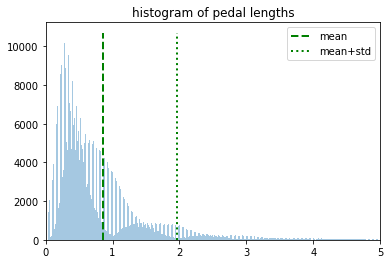

In [6]:
pedal_lengths_mean = np.mean(pedal_lengths)
pedal_lengths_meanplusstd = np.mean(pedal_lengths) + np.std(pedal_lengths)
sns.distplot(pedal_lengths, bins=int(np.max(pedal_lengths)*100), kde=False)
ymin,ymax = plt.ylim()
plt.vlines(pedal_lengths_mean, ymin, ymax, linestyle='dashed', lw=2, color='green',label='mean')
plt.vlines(pedal_lengths_meanplusstd, ymin, ymax, linestyle='dotted', lw=2, color='green',label='mean+std')
plt.xlim(0, 5)
plt.legend()
plt.title('histogram of pedal lengths')

In [7]:
hist, bin_edges = np.histogram(pedal_lengths, bins=np.arange(0,5,0.1))
print('minimum length: {:.2f} seconds'.format(bin_edges[np.argmax(hist)]))
print('maximum length: {:.2f} seconds'.format(pedal_lengths_meanplusstd))

minimum length: 0.30 seconds
maximum length: 1.97 seconds
